Yolanda TH 1872045
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:
import pandas as pd

In [ ]:
location = "/content/drive/MyDrive/UTS PIMO/1872045_philoit.csv"
df = pd.read_csv(location)

In [ ]:
df

,Unnamed: 0,created_at,y
0,1788,2020-02-01 00:37:00,0
1,1789,2020-02-01 00:41:34,0
2,1790,2020-02-01 00:41:34,0
3,1791,2020-02-01 00:41:34,0
4,1792,2020-02-01 01:25:41,0
...,...,...,...
3133,4921,2020-04-28 04:44:43,0
3134,4922,2020-04-29 08:25:54,0
3135,4923,2020-04-29 08:26:15,0
3136,4924,2020-04-29 08:26:39,0


In [ ]:
from matplotlib import pyplot as plt

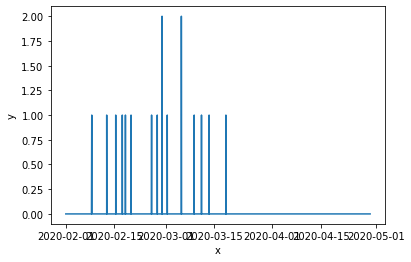

In [ ]:
df = pd.read_csv(location, parse_dates = ['created_at'], index_col = ['created_at'])
df.drop(df.columns[0], axis=1, inplace=True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df)

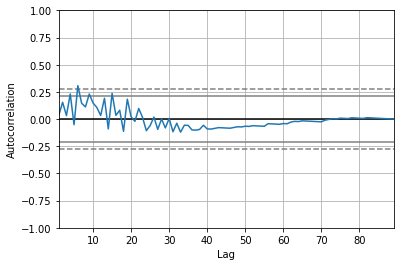

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

In [41]:
pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-s6j9pmf5
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-s6j9pmf5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+319.g77bb1d276-cp37-cp37m-linux_x86_64.whl size=17615749 sha256=172f992b7f9a70435f28f21f333d84d8f1e095fe5b473472ae16883b57139774
  Stored in directory: /tmp/pip-ephem-wheel-cache-0gpsmv65/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   89
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -65.871
Date:                Fri, 16 Apr 2021   AIC                            143.742
Time:                        07:01:56   BIC                            158.606
Sample:                    02-01-2020   HQIC                           149.731
                         - 04-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8524      0.092     -9.299      0.000      -1.032      -0.673
ar.L2         -0.7094      0.104     -6.846      0.000      -0.912      -0.506
ar.L3         -0.6020      0.095     -6.313      0.0

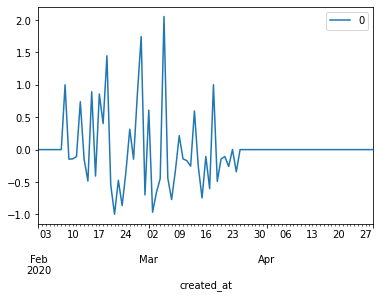

In [49]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

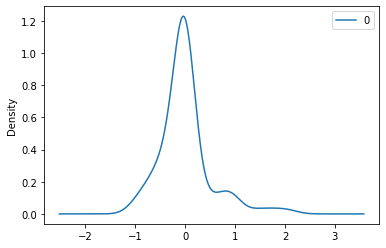

In [51]:
residuals.plot(kind='kde')
plt.show()

In [52]:
print(residuals.describe())

                   0
count   8.900000e+01
mean   -2.445848e-13
std     5.069022e-01
min    -9.971211e-01
25%    -1.475722e-01
50%   -1.271295e-101
75%     1.077298e-38
max     2.054068e+00


In [53]:
#forcasting 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [55]:
X = df.values
train, test = X, X
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.032995, expected=0.000000
predicted=0.034948, expected=0.000000
predicted=-0.049146, expected=0.000000
predicted=0.213898, expected=1.000000
predicted=-0.090887, expected=0.000000
predicted=0.329429, expected=0.000000
predicted=0.087666, expected=1.000000
predicted=0.301646, expected=0.000000
predicted=0.175482, expected=1.000000
predicted=0.268160, expected=1.000000
predicted=0.509782, expected=2.000000
predicted=0.023102, expected=0.000000
predicted=0.941947, expected=0.000000
predicted=0.238891, expected=0.000000
predicted=0.709973, expected=0.000000
predicted=0.438901, expected=0.000000
predicted=0.726033, expected=1.000000
predicted=0.834059, expected=0.000000
predict

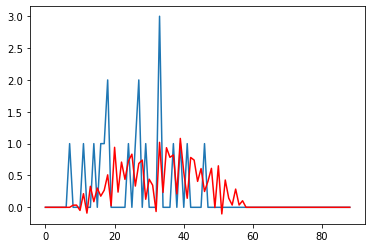

In [56]:
#prediction : red
#expected value : blue
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()